БЕЗУСЛОВНЫЕ ЭКСТРЕМУМЫ

In [2]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)
 
sol = solve([eq1, eq2], [x, y])
sol

[(-2, -1), (-1, -2), (1, 2), (2, 1)]

In [7]:
# 3.5

import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
A = np.array([
    [6, -2],
    [-2, -480]
])
A
print('Determinant: {:.2f}'.format(np.linalg.det(A)))

Determinant: -2884.00


ОПТИМИЗАЦИЯ

In [8]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

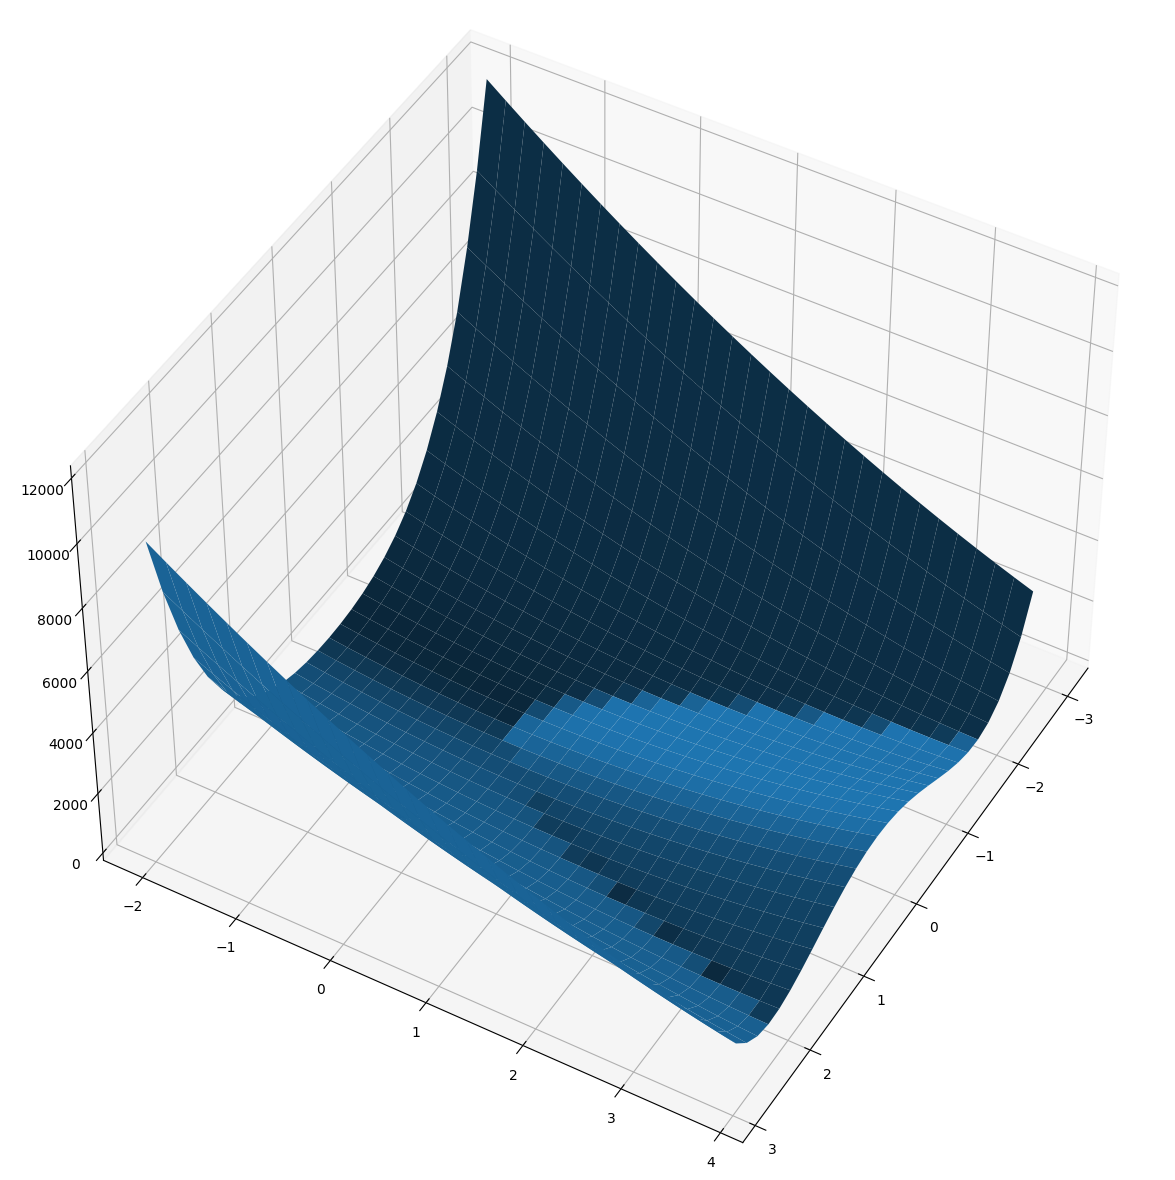

In [9]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, необходимо установить method = 'powell' в функции minim.

In [10]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


опустим, у нас есть некоторая точка  в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм метода Нелдера — Мида (также его называют симплекс-методом):

In [11]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


→ Симплекс-метод является стандартным методом линейного программирования  для решения задачи оптимизации, в которой есть функция и несколько ограничений, выраженных в виде неравенств. Неравенства определяют область в форме многоугольника, в одной из вершин которого обычно находится решение. Симплекс-метод представляет собой систематическую процедуру проверки вершин как возможных решений.

In [12]:
# 4.5

import numpy as np
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r
 
 
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
res =  least_squares(func_rosen, x1)
print(res.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


Пример № 3

У нас есть два станка для производства пластиковых упаковок. Станки разных моделей, поэтому при их использовании получаются разные издержки, зависящие от произведённых упаковок и выражаемые следующими функциями:

Здесь  — это количество упаковок, произведённых на первом станке, а  — количество упаковок, произведённых на втором станке.

Нам заказали 200 упаковок. Мы хотим выполнить заказ, минимизировав расходы на изготовление товаров. Чтобы узнать, как мы можем сэкономить, необходимо решить задачу оптимизации.

In [13]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [20]:
# 5.3
from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)
print(sols)

[(1.00000000000000, 0.0, 0.707106781186548)]


In [26]:
# 5.4 Прямоугольный параллелепипед имеет объём. Чему равна минимальная площадь его поверхности?
from sympy import *
a,b,c,w=symbols(' a b c w' )
g = 2*(a*b + a*c + b*c)
f = 2*(a*c+a*b+b*c) + w*(a*b*c-1)
fa = f.diff(a)
fb = f.diff(b)
fc = f.diff(c)
fw = f.diff(w)
sols = solve([fa,fb,fc,fw],a,b,c,w)
print(sols)

print(solve([fa, fb, fc, fw], a, b, c, w)[0])

[(1, 1, 1, -4), (-1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 2 - 2*sqrt(3)*I), (-1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 2 + 2*sqrt(3)*I)]
(1, 1, 1, -4)


Ограничения в виде неравенства можно свести к ограничениям равенства с помощью дополнительной переменной .

Записанное выше ограничение стоит понимать следующим образом: если мы хотим, чтобы функция гарантированно была неположительной, то она должна давать ноль в сумме с каким-то заведомо неотрицательным значением.

Длина забора — 20 метров. Какова максимальная площадь прямоугольного участка, который можно огородить? Хотя бы одна из сторон прямоугольника должна быть не меньше 6.

In [27]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


ГРАДИЕНТ

In [28]:
import numpy as np

In [29]:
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
 
np.gradient(f)

# array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [30]:
# 6.7

f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)

# array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

ВИЗУАЛИЗАЦИЯ ГРАДИЕНТНОГО СПУСКА

In [31]:
# простейшую выпуклую функцию

def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [32]:
#Определим функцию, которая вычислит градиент:

def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [33]:
# запрограммируем простейший вариант для градиентного спуска

def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [34]:
# функцию, которая будет строить график:

def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

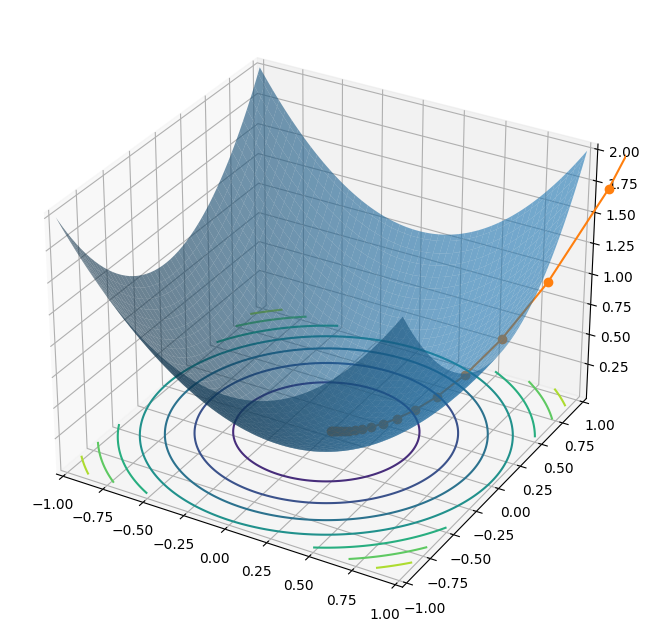

In [35]:
#изуализируем и получим следующее движение градиентного спуска к минимуму:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)